In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline

In [6]:
labels = ['Tuberculosis', 'Normal']
img_size = 200
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [10]:
data = get_training_data('E:\TB_Chest_Radiography_Database')

C:\Users\gauti\AppData\Local\Temp/ipykernel_7828/957143572.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


C:\Users\gauti\Anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

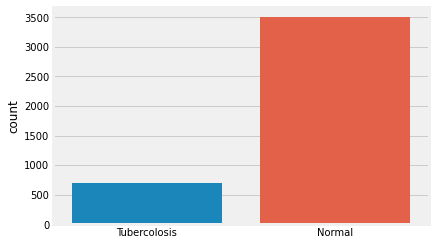

In [11]:
temp=[]
for i, j in data:
    if j == 0:
        temp.append('Tubercolosis')
    else:
        temp.append('Normal')
        
sns.countplot(temp)


In [14]:
X = []
Y = []
for feature, label in data:
    X.append(feature)
    Y.append(label)

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [16]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(Y_train),y=Y_train)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 3.1012658227848102, 1: 0.5961070559610706}


C:\Users\gauti\Anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

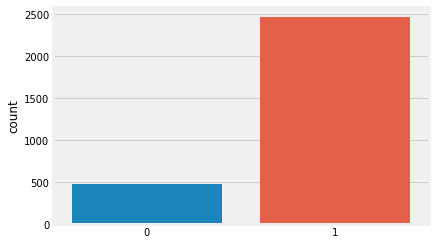

In [17]:
sns.countplot(Y_train)

C:\Users\gauti\Anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

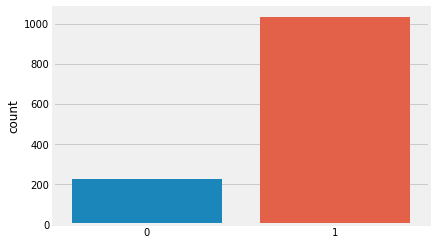

In [18]:
sns.countplot(Y_test)

In [19]:
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255


In [20]:
print(X_train.shape)
print(X_test.shape)


(2940, 200, 200)
(1260, 200, 200)


In [21]:
X_train = X_train.reshape(-1, img_size, img_size, 1)
Y_train = np.array(Y_train)


X_test = X_test.reshape(-1, img_size, img_size, 1)
Y_test = np.array(Y_test)


In [22]:
print(X_train.shape)
print(X_test.shape)


(2940, 200, 200, 1)
(1260, 200, 200, 1)


In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
     model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      320       
                                                                 
 activation (Activation)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 100, 100, 64)      0         
                                                        

In [25]:
history = model.fit(X_train, Y_train, epochs=25,batch_size=25, class_weight=class_weights,validation_split=0.1, shuffle=True)

Epoch 1/25
106/106 [==============================] - 198s 2s/step - loss: 0.5740 - accuracy: 0.7634 - val_loss: 0.1997 - val_accuracy: 0.9184
Epoch 2/25
106/106 [==============================] - 200s 2s/step - loss: 0.2951 - accuracy: 0.8730 - val_loss: 0.3036 - val_accuracy: 0.8435
Epoch 3/25
106/106 [==============================] - 191s 2s/step - loss: 0.1779 - accuracy: 0.9305 - val_loss: 0.1078 - val_accuracy: 0.9592
Epoch 4/25
106/106 [==============================] - 190s 2s/step - loss: 0.1421 - accuracy: 0.9460 - val_loss: 0.0825 - val_accuracy: 0.9762
Epoch 5/25
106/106 [==============================] - 193s 2s/step - loss: 0.1174 - accuracy: 0.9584 - val_loss: 0.0710 - val_accuracy: 0.9728
Epoch 6/25
106/106 [==============================] - 190s 2s/step - loss: 0.0703 - accuracy: 0.9732 - val_loss: 0.0975 - val_accuracy: 0.9660
Epoch 7/25
106/106 [==============================] - 192s 2s/step - loss: 0.0676 - accuracy: 0.9762 - val_loss: 0.0818 - val_accuracy: 0.9660

In [26]:
scores = model.evaluate(X_test, Y_test)

40/40 [==============================] - 26s 641ms/step - loss: 0.1350 - accuracy: 0.9746


In [27]:
from keras.models import load_model

model.save('tb_detector.h5')

In [28]:
prediction=model.predict(X_test) 
for i in prediction:
    if(i<0.5):
        print(0)
    else:
        print(1)

1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
0
0
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
0
0
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
0
1
1
0
1
1
0
1
0
1
0
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
0
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1


In [1]:
print(Y_test)

NameError: name 'Y_test' is not defined

In [7]:
def predict_image(filename):
    for img in os.listdir(filename):
        try:
            img_arr = cv2.imread(os.path.join(filename, img), cv2.IMREAD_GRAYSCALE)
            resized_arr = cv2.resize(img_arr, (img_size, img_size))
        except Exception as e:
            print(e)
        image = np.array(resized_arr) / 255.0
        image = image.reshape(-1,img_size,img_size,1)
        model = load_model('tb_detector.h5')
        prediction = model.predict(image)
        print(img)
        if(prediction[0] > 0.5):
            stat = prediction[0] * 100 
            print("This image is %.2f percent %s"% (stat, "Normal"))
        else:
            stat = (1.0 - prediction[0]) * 100
            print("This image is %.2f percent %s" % (stat, "Tubercolosis"))

In [8]:
predict_image("C:\\Users\\gauti\\Desktop\\testing")

NameError: name 'load_model' is not defined